# Oil Futures

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\3\04-Stu_Time_Series_Linear_Regression\Resources\oil_futures.csv'),
                 parse_dates=True, 
                 index_col='Date')

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return
Date,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,0.318376
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,-0.049588
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472


<AxesSubplot:xlabel='Date'>

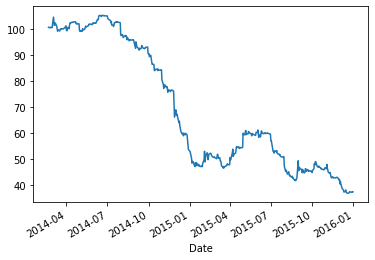

In [3]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

<AxesSubplot:xlabel='Date'>

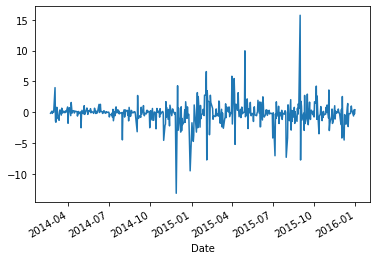

In [4]:
# Create a column of the settle price returns
returns = df["Settle"].pct_change() * 100

returns.plot()

In [5]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df["Returns"] = returns.copy()
df["Lagged_Return"] = df["Returns"].shift()

df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Returns
Date,,,,,,,,,,
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0,NaN,NaN
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0,NaN,-0.168684
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.159030
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320


In [6]:
# Drop NAs
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Returns
Date,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.159030
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933


# Prepare the Features (X) and the Target (y)

In [7]:
# Set y as the `Return` column
y = df.Returns

y.head()

Date
2014-02-24    0.159030
2014-02-25   -0.198472
2014-02-26    0.119320
2014-02-27   -0.019863
2014-02-28    0.009933
Name: Returns, dtype: float64

In [8]:
# Select the `Lagged_Return` as a DataFrame
X = pd.DataFrame(df["Lagged_Return"])

X.head()

,Lagged_Return
Date,
2014-02-24,-0.168684
2014-02-25,0.159030
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863


In [9]:
# Access the weekofyear attribute from the index. Create a new column with this called `Week_of_year`
X["Week_of_Year"] = X.index.weekofyear

X.head()

<ipython-input-9-619102e0e6f1>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["Week_of_Year"] = X.index.weekofyear


,Lagged_Return,Week_of_Year
Date,,
2014-02-24,-0.168684,9
2014-02-25,0.159030,9
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9


### Get dummy variables for week and year

In [10]:
# Use `get_dummies` to generate the features for each week of the year
X_dummies = pd.get_dummies(X,
                           columns=["Week_of_Year"])

X_dummies.head(2)

,Lagged_Return,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52,Week_of_Year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-24,-0.168684,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-25,0.159030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [11]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()

model.fit(X_dummies, y)

predictions = model.predict(X_dummies)

In [12]:
# List the first 10 predicted values
predictions[:10]

array([-0.09408009, -0.19278838, -0.08510803, -0.18082762, -0.13890543,
        0.22904997, -0.96762181,  0.66360517,  0.72241888,  0.19940254])

In [19]:
print(model.coef_)

[-0.30120236 -6.74704935 -1.68446477  0.0714947  -0.35515125  0.89872237
  2.22597612  0.59707952 -0.09061907  0.20168196  0.5786121  -0.72371072
  0.22779306  0.64614204  0.94881678  1.15896206  1.1214696   0.22942274
  1.25200338  0.41161981  0.58829196  0.38742871  0.52328642  0.15305632
  0.93115012  0.31862607  0.31372788 -0.60289696 -0.79516882  0.14851616
  0.07723996 -1.03905999 -0.70732084 -0.04367345 -0.02185091  0.3824326
  1.43553185 -0.17076143  0.45769903  0.38479749 -0.13593211  0.88933901
 -0.50853583  0.01217366  0.02497843 -0.54006785 -0.61795014  0.33948031
 -1.340771   -0.65319642 -1.78278139 -0.15181582  0.47488631  0.30033963]


In [18]:
print(model.intercept_)

-0.3465701545053039


# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
r2 = r2_score(y, predictions)

# Calculate mean squared error. A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
mse = mean_squared_error(y, predictions)

# Using mean squared error above, calculate root-mean-squared error (RMSE)
rms = np.sqrt(mse)

# Standard deviation
std = np.std(y)

print(f"R2 is {r2}")
print(f"MSE is {mse}")
print(f"RMS is {rms}")
print(f"STD is {std}")

R2 is 0.20040272358975775
MSE is 2.9861924939839137
RMS is 1.7280603270672912
STD is 1.9325166602824382


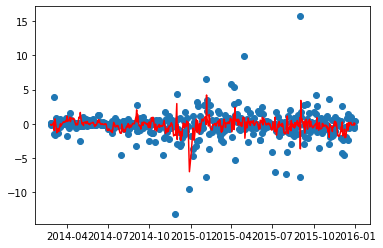

In [24]:
# Plot the regression line
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X.index, y)
plt.plot(X.index, predictions, color='red')